# 1 - Statistik

In [1]:
# aber wir werden die generelle Methode nutzen
import pickle

with open('df.pkl', 'rb') as file:
    df = pickle.load(file)

/tmp/ipykernel_4839/344725740.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  df = pickle.load(file)


In [2]:
import numpy as np
from scipy import stats
import pandas as pd

In [3]:
df.describe(include = 'all').T

count unique          top   freq  \
country                                  12364      7            J   1837   
is_urban                                 12364      2        False   8264   
age                                    12364.0    NaN          NaN    NaN   
gender                                   12364      2       female   6902   
married                                  12364      2         True   7989   
religion                                 12364      5            X   5285   
relationship_to_hh_head                  12364      7         Head   5143   
education_level                        12364.0    NaN          NaN    NaN   
literacy                                 12364      2         True   7696   
can_add                                  12364      2         True  11241   
can_divide                               12364      2         True  10148   
can_calc_percents                        12364      2        False   7488   
can_calc_compounding                     12364      2        False   6846   
employed_last_year                       12364      2         True   7280   
employment_category_last_year            12364      5     employed   7280   
employment_type_last_year                12364      5  not_working   4432   
share_hh_income_provided               12068.0    NaN          NaN    NaN   
income_ag_livestock_last_year            12364      2        False   7763   
income_friends_family_last_year          12364      2        False   7296   
income_government_last_year              12364      2        False  11650   
income_own_business_last_year            12364      2        False   8690   
income_private_sector_last_year          12364      2        False  11136   
income_public_sector_last_year           12364      2        False  11940   
num_times_borrowed_last_year           12364.0    NaN          NaN    NaN   
borrowing_recency                      12364.0    NaN          NaN    NaN   
formal_savings                           12364      2        False   8650   
informal_savings                         12364      2        False  10188   
cash_property_savings                    12364      2        False   7564   
has_insurance                            12364      2        False  10729   
has_investment                           12364      2        False   8638   
num_shocks_last_year                   12364.0    NaN          NaN    NaN   
avg_shock_strength_last_year           12364.0    NaN          NaN    NaN   
borrowed_for_emergency_last_year         12364      2        False   9684   
borrowed_for_daily_expenses_last_year    12364      2        False  10148   
borrowed_for_home_or_biz_last_year       12364      2        False  10638   
phone_technology                       12364.0    NaN          NaN    NaN   
can_call                                 12364      2         True   9516   
can_text                                 12364      2        False   6261   
can_use_internet                         12364      2        False   9247   
can_make_transaction                     12364      2        False   8883   
phone_ownership                        12364.0    NaN          NaN    NaN   
advanced_phone_use                       12364      2        False   8675   
reg_bank_acct                            12364      2        False   8879   
reg_mm_acct                              12364      2        False   8802   
reg_formal_nbfi_account                  12364      2        False  11362   
financially_included                     12364      2        False   6185   
active_bank_user                         12364      2        False   9809   
active_mm_user                           12364      2        False   9329   
active_formal_nbfi_user                  12364      2        False  11661   
active_informal_nbfi_user                12364      2        False  10556   
nonreg_active_mm_user                    12364      2        False  11317   
num_formal_institutions_last_year    

In [9]:
def weiter_stats(df):
    
    _corr = pd.Series()
    _skew = pd.Series()
    _kurt = pd.Series()

    for col in df.columns:
        try:
            _corr[col] = np.corrcoef(x = df[col], y = df['poverty_probability'])[0][1]
        except:
            _corr[col] = np.nan
        try:
            _skew[col] = stats.skew(df[col])
        except:
            _skew[col] = np.nan
        try:
            _kurt[col] = stats.kurtosis(df[col])
        except:
            _kurt[col] = np.nan

    stats_df = df.describe(include = 'all').T
    stats_df['corrcoef'] = _corr
    stats_df['skew'] = _skew
    stats_df['kurtosis'] = _kurt

    return stats_df

In [10]:
stats_df = weiter_stats(df)

In [11]:
stats_df

count unique          top   freq  \
country                                  12364      7            J   1837   
is_urban                                 12364      2        False   8264   
age                                    12364.0    NaN          NaN    NaN   
gender                                   12364      2       female   6902   
married                                  12364      2         True   7989   
religion                                 12364      5            X   5285   
relationship_to_hh_head                  12364      7         Head   5143   
education_level                        12364.0    NaN          NaN    NaN   
literacy                                 12364      2         True   7696   
can_add                                  12364      2         True  11241   
can_divide                               12364      2         True  10148   
can_calc_percents                        12364      2        False   7488   
can_calc_compounding                     12364      2        False   6846   
employed_last_year                       12364      2         True   7280   
employment_category_last_year            12364      5     employed   7280   
employment_type_last_year                12364      5  not_working   4432   
share_hh_income_provided               12068.0    NaN          NaN    NaN   
income_ag_livestock_last_year            12364      2        False   7763   
income_friends_family_last_year          12364      2        False   7296   
income_government_last_year              12364      2        False  11650   
income_own_business_last_year            12364      2        False   8690   
income_private_sector_last_year          12364      2        False  11136   
income_public_sector_last_year           12364      2        False  11940   
num_times_borrowed_last_year           12364.0    NaN          NaN    NaN   
borrowing_recency                      12364.0    NaN          NaN    NaN   
formal_savings                           12364      2        False   8650   
informal_savings                         12364      2        False  10188   
cash_property_savings                    12364      2        False   7564   
has_insurance                            12364      2        False  10729   
has_investment                           12364      2        False   8638   
num_shocks_last_year                   12364.0    NaN          NaN    NaN   
avg_shock_strength_last_year           12364.0    NaN          NaN    NaN   
borrowed_for_emergency_last_year         12364      2        False   9684   
borrowed_for_daily_expenses_last_year    12364      2        False  10148   
borrowed_for_home_or_biz_last_year       12364      2        False  10638   
phone_technology                       12364.0    NaN          NaN    NaN   
can_call                                 12364      2         True   9516   
can_text                                 12364      2        False   6261   
can_use_internet                         12364      2        False   9247   
can_make_transaction                     12364      2        False   8883   
phone_ownership                        12364.0    NaN          NaN    NaN   
advanced_phone_use                       12364      2        False   8675   
reg_bank_acct                            12364      2        False   8879   
reg_mm_acct                              12364      2        False   8802   
reg_formal_nbfi_account                  12364      2        False  11362   
financially_included                     12364      2        False   6185   
active_bank_user                         12364      2        False   9809   
active_mm_user                           12364      2        False   9329   
active_formal_nbfi_user                  12364      2        False  11661   
active_informal_nbfi_user                12364      2        False  10556   
nonreg_active_mm_user                    12364      2        False  11317   
num_formal_institutions_last_year    

## beware of the Datasaurus!!!

[Datasaurus](https://dl.acm.org/doi/10.1145/3025453.3025912#)

# 2 - OLS und Statistische Tests

In [12]:
import statsmodels.api as sm

In [13]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [14]:
stats_df['corrcoef'].sort_values()

education_level                         -0.345487
is_urban                                -0.289287
phone_technology                        -0.287777
can_use_internet                        -0.282023
can_text                                -0.259108
num_financial_activities_last_year      -0.257001
phone_ownership                         -0.249417
formal_savings                          -0.249417
advanced_phone_use                      -0.246281
active_bank_user                        -0.243165
reg_bank_acct                           -0.232604
can_make_transaction                    -0.220259
num_formal_institutions_last_year       -0.206547
literacy                                -0.191259
financially_included                    -0.185993
has_investment                           -0.15938
active_mm_user                          -0.151873
can_call                                -0.149521
income_private_sector_last_year          -0.14434
income_friends_family_last_year         -0.125777


In [15]:
df.merge(pd.get_dummies(df['country'], prefix = 'country_'),left_index=True, right_index=True)

country  is_urban  age  gender  married religion  \
row_id                                                     
0.0           C         0   18  female        1        P   
1.0           C         1   30  female        1        P   
2.0           A         0   20  female        1        Q   
3.0           A         0   61    male        1        Q   
4.0           D         0   26  female        1        X   
...         ...       ...  ...     ...      ...      ...   
12595.0       C         1   50    male        1        P   
12596.0       D         0   90    male        0        O   
12597.0       J         0   52  female        0        X   
12598.0       I         0   40    male        1        Q   
12599.0       D         1   24    male        0        X   

        relationship_to_hh_head  education_level  literacy  can_add  ...  \
row_id                                                               ...   
0.0                       Other              1.0         1        1  ...   
1.0                       Other              1.0         1        1  ...   
2.0                      Spouse              1.0         1        1  ...   
3.0                        Head              0.0         0        1  ...   
4.0                      Spouse              1.0         1        0  ...   
...                         ...              ...       ...      ...  ...   
12595.0                    Head              1.0         1        1  ...   
12596.0                    Head              0.0         1        1  ...   
12597.0                    Head              1.0         0        1  ...   
12598.0                    Head              0.0         0        1  ...   
12599.0            Son/Daughter              2.0         1        1  ...   

         num_informal_institutions_last_year  \
row_id                                         
0.0                                        0   
1.0                                        0   
2.0                                        0   
3.0                                        0   
4.0                                        0   
...                                      ...   
12595.0                                    0   
12596.0                                    0   
12597.0                                    1   
12598.0                                    0   
12599.0                                    0   

         num_financial_activities_last_year  poverty_probability  country__A  \
row_id                                                                         
0.0                                       1                0.515       False   
1.0                                       0                0.981       False   
2.0                                       0                0.982        True   
3.0                                       0                0.879        True   
4.0                                       3                0.796       False   
...                                     ...                  ...         ...   
12595.0                                   1                0.990       False   
12596.0                                   0                0.950       False   
12597.0                                   0                0.342       False   
12598.0                                   0                0.846       False   
12599.0                                   6                0.569       False   

        country__C country__D  country__F  country__G  country__I  country__J  
row_id                                                                         
0.0           True      False       False       False       False       False  
1.0           True      False       False       False       False       False  
2.0          False      False       False       False       False       False  
3.0          False      False       False       False       False       False  
4.0          False       True       False       False       False       False  
...         

In [16]:

X= df[['education_level','is_urban','phone_technology','can_use_internet','active_bank_user']]#,'can_text','num_financial_activities_last_year','age'

X = sm.add_constant(X) # Adding a constant to include an intercept in the model
model_OLS = sm.OLS(df['poverty_probability'], X)
model_OLS = model_OLS.fit()
print(model_OLS.summary())


                             OLS Regression Results                            
Dep. Variable:     poverty_probability   R-squared:                       0.200
Model:                             OLS   Adj. R-squared:                  0.200
Method:                  Least Squares   F-statistic:                     617.4
Date:                 Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                         11:02:07   Log-Likelihood:                -939.48
No. Observations:                12364   AIC:                             1891.
Df Residuals:                    12358   BIC:                             1936.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7898   

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

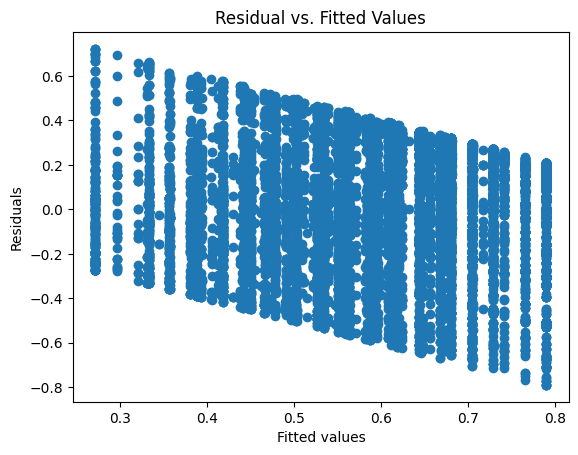

In [24]:
# Residual plot
plt.scatter(model_OLS.fittedvalues, model_OLS.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Values')
plt.show()

In [25]:
model_OLS.fittedvalues.min()

0.2722662468014698

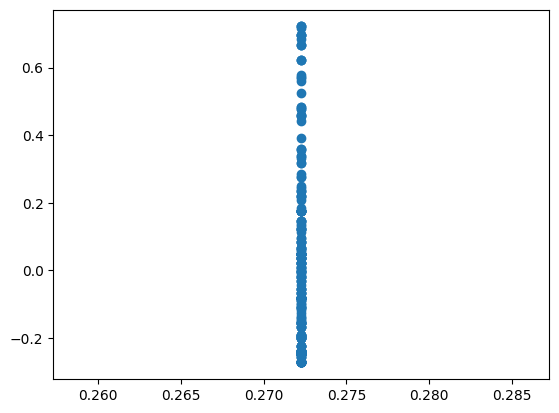

In [26]:

plt.scatter(model_OLS.fittedvalues[model_OLS.fittedvalues == model_OLS.fittedvalues.min()], model_OLS.resid[model_OLS.fittedvalues == model_OLS.fittedvalues.min()])


<Axes: ylabel='Count'>

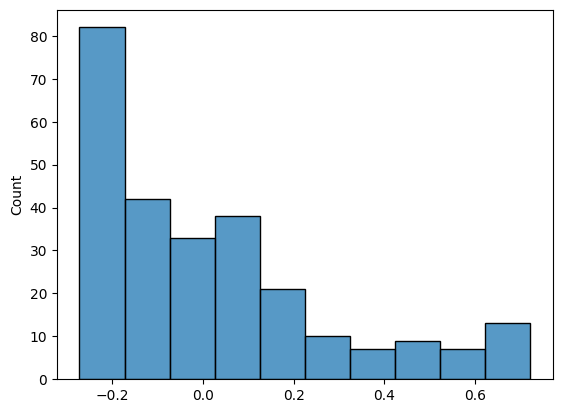

In [27]:
sns.histplot(model_OLS.resid[model_OLS.fittedvalues == model_OLS.fittedvalues.min()])

<Axes: ylabel='Count'>

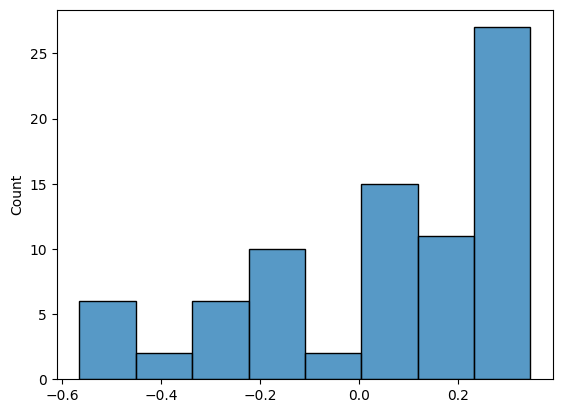

In [28]:
sns.histplot(model_OLS.resid[model_OLS.fittedvalues == model_OLS.fittedvalues.unique()[0]])

In [29]:
model_OLS.fittedvalues.unique()[0]

0.6438662311592321

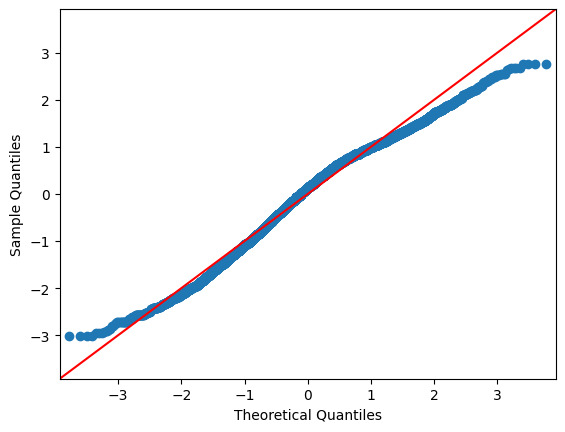

In [30]:
# QQ plot for normality
fig = sm.qqplot(model_OLS.resid, fit=True, line='45')
plt.show()

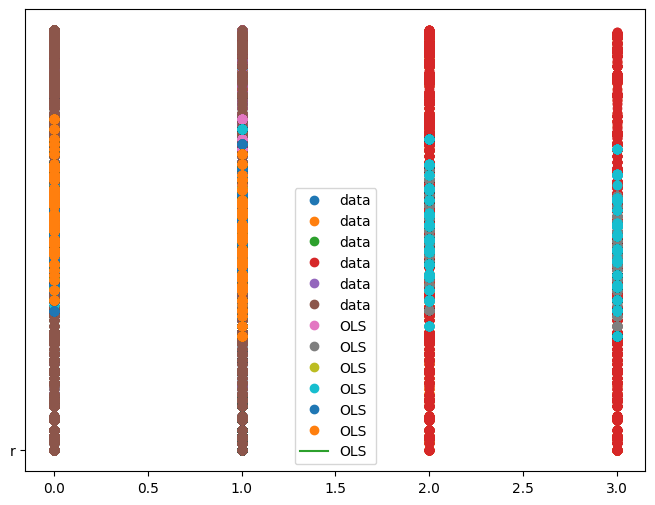

In [208]:
pred_ols = model_OLS.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, df['poverty_probability'], "o", label="data")
# ax.plot(x, y_true, "b-", label="True")
ax.plot(X, model_OLS.fittedvalues, "o", "r", label="OLS")
# ax.plot(X, iv_u, "r--")
# ax.plot(X, iv_l, "r--")
ax.legend(loc="best")


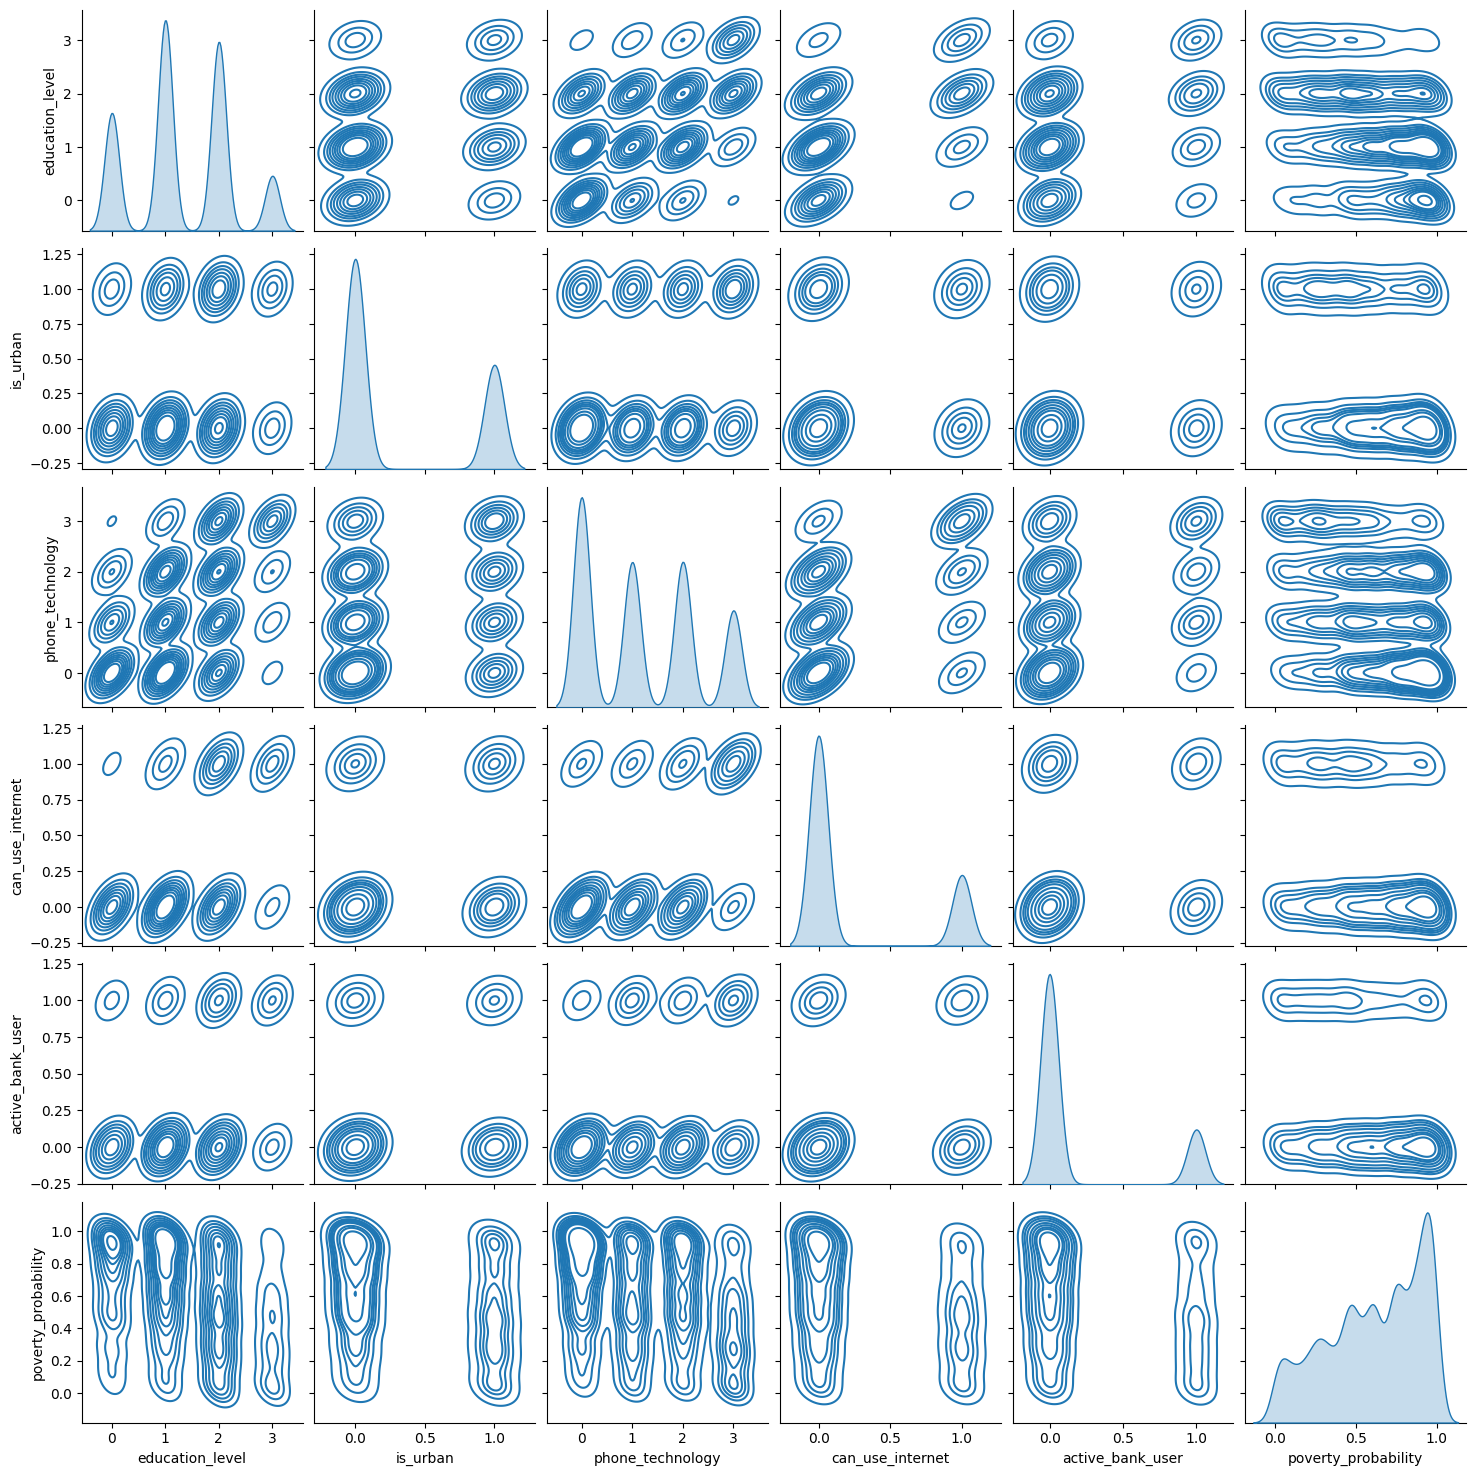

In [193]:
sns.pairplot(data = X.drop(columns='const').merge(df['poverty_probability'], left_index=True, right_index=True), kind='kde')

# 3 - Erstellung einer Modellclass

In [204]:
class model_poverty_prob:

    def __init__(self, train_data_str, target_data_str):
        self.train_data_str = train_data_str
        self.target_data_str = target_data_str
        
    # DataFrame mit einer feinere Regel füllen
    # APPLY FUNCTION
    def app_func(self,row):
        """
        Lineare Interpolation von NaN zwischen 2 vorhanden Werte 
        """
    
        # kontrollieren ob NaN in der Spalte sind
        if row.isnull().sum() > 0:
            _row = row # temporär Kopie von der Spalte
            null_indices = _row[_row.isna()].index # Indexe von NaN
    
            first_index = null_indices[0]-1 # Index vom letzten Wert vor NaNs
            last_index = null_indices[-1]+1 # Index vom ertsten Wert nach NaNs
    
            # Series mit den interpolierten Daten sowie die Indexe von NaNs
            null_substitution = pd.Series(data  = [_row[first_index] + i*(_row[last_index]-_row[first_index])/(len(null_indices)+1) for i in range(1,len(null_indices)+1)],
                                       index = null_indices) 
    
            # Überschreiben von NaN in der temporär Kopie der Spalte mit den interpolierten Werte
            _row[null_indices] = null_substitution
    
            # Rückgabe vom gefüllte temporär Kopie der Spalte
            return _row
        # falls keine NaN, geben wir die gleiche Spalte zurück 
        else:
            return row
            
    def prep_dataset(self):
        self.train_df = pd.read_excel(f'../{self.train_data_str}')
        self.target_df = pd.read_excel(f'../{self.target_data_str}',
                        index_col= 0)

        self.train_df['female'] = self.train_df['female'].map({True: 'female', False: 'male'})
        self.train_df = self.train_df.rename(columns={'female':'gender'})

        self.train_df['row_id'] = self.app_func(self.train_df['row_id'])

        self.train_df = self.train_df.set_index('row_id')

        self.train_df = self.train_df.merge(pd.get_dummies(self.train_df['country'], prefix = 'country_'),left_index=True, right_index=True)

        self.train_df = self.train_df.merge(self.target_df, left_index=True, right_index=True)

        for col in self.train_df.columns:
            if self.train_df[col].dtype == 'bool':
                self.train_df[col] = self.train_df[col].astype(int)

    def describe_dataset(self):

        self.train_df.info()
        
        _corr = pd.Series()
        _skew = pd.Series()
        _kurt = pd.Series()
    
        for col in self.train_df.columns:
            try:
                _corr[col] = np.corrcoef(x = df[col], y = self.train_df['poverty_probability'])[0][1]
            except:
                _corr[col] = np.nan
            try:
                _skew[col] = stats.skew(self.train_df[col])
            except:
                _skew[col] = np.nan
            try:
                _kurt[col] = stats.kurtosis(self.train_df[col])
            except:
                _kurt[col] = np.nan
    
        stats_df = self.train_df.describe(include = 'all').T
        stats_df['corrcoef'] = _corr
        stats_df['skew'] = _skew
        stats_df['kurtosis'] = _kurt

        self.train_df_describe = stats_df

    def drop_cols(self,col_list):

        self.train_df = self.train_df.drop(columns=col_list)
    
    def drop_na(self,col_list):
        self.train_df = self.train_df.dropna(subset = 'education_level')

    def OLS_mod(self,col_list):
        
        self.X_OLS= self.train_df[col_list]#,'can_text','num_financial_activities_last_year','age'

        self.X_OLS = sm.add_constant(self.X_OLS) # Adding a constant to include an intercept in the model
        self.model_OLS = sm.OLS(self.train_df['poverty_probability'], self.X_OLS)
        self.model_OLS = self.model_OLS.fit()
        print(self.model_OLS.summary())

    def OLS_charts(self):

        fig, axs = plt.subplots(1,2,figsize=(20,10))

        # Residual plot
        axs[0].scatter(self.model_OLS.fittedvalues, self.model_OLS.resid)
        axs[0].set_xlabel('Fitted values')
        axs[0].set_ylabel('Residuals')
        axs[0].set_title('Residual vs. Fitted Values')

        # QQ plot for normality
        sm.qqplot(model_OLS.resid, fit=True, line='45',ax=axs[1])
        axs[1].set_title('QQ plot for normality')

    def OLS_pairplot(self):
        sns.pairplot(data = self.X_OLS.drop(columns='const').merge(self.train_df['poverty_probability'], left_index=True, right_index=True), kind='kde')
        


In [205]:
train_data_str = 'train_values.xlsx'
target_data_str = 'train_labels.xlsx'

In [206]:
mod_ = model_poverty_prob(train_data_str, target_data_str)

In [207]:
mod_.prep_dataset()

/tmp/ipykernel_4839/68973429.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _row[null_indices] = null_substitution


In [208]:
mod_.train_df

country  is_urban  age  gender  married religion  \
row_id                                                     
0.0           C         0   18  female        1        P   
1.0           C         1   30  female        1        P   
2.0           A         0   20  female        1        Q   
3.0           A         0   61    male        1        Q   
4.0           D         0   26  female        1        X   
...         ...       ...  ...     ...      ...      ...   
12595.0       C         1   50    male        1        P   
12596.0       D         0   90    male        0        O   
12597.0       J         0   52  female        0        X   
12598.0       I         0   40    male        1        Q   
12599.0       D         1   24    male        0        X   

        relationship_to_hh_head  education_level  literacy  can_add  ...  \
row_id                                                               ...   
0.0                       Other              1.0         1        1  ...   
1.0                       Other              1.0         1        1  ...   
2.0                      Spouse              1.0         1        1  ...   
3.0                        Head              0.0         0        1  ...   
4.0                      Spouse              1.0         1        0  ...   
...                         ...              ...       ...      ...  ...   
12595.0                    Head              1.0         1        1  ...   
12596.0                    Head              0.0         1        1  ...   
12597.0                    Head              1.0         0        1  ...   
12598.0                    Head              0.0         0        1  ...   
12599.0            Son/Daughter              2.0         1        1  ...   

         num_informal_institutions_last_year  \
row_id                                         
0.0                                        0   
1.0                                        0   
2.0                                        0   
3.0                                        0   
4.0                                        0   
...                                      ...   
12595.0                                    0   
12596.0                                    0   
12597.0                                    1   
12598.0                                    0   
12599.0                                    0   

         num_financial_activities_last_year  country__A  country__C  \
row_id                                                                
0.0                                       1           0           1   
1.0                                       0           0           1   
2.0                                       0           1           0   
3.0                                       0           1           0   
4.0                                       3           0           0   
...                                     ...         ...         ...   
12595.0                                   1           0           1   
12596.0                                   0           0           0   
12597.0                                   0           0           0   
12598.0                                   0           0           0   
12599.0                                   6           0           0   

        country__D country__F  country__G  country__I  country__J  \
row_id                                                              
0.0              0          0           0           0           0   
1.0              0          0           0           0           0   
2.0              0          0           0           0           0   
3.0              0          0           0           0           0   
4.0              1          0           0           0           0   
...            ...        ...         ...         ...         ...   
12595.0          0          0           0           0           0   
12596.0          1          0           0           0           0   

In [209]:
mod_.describe_dataset()

<class 'pandas.core.frame.DataFrame'>
Index: 12600 entries, 0.0 to 12599.0
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                12600 non-null  object 
 1   is_urban                               12600 non-null  int64  
 2   age                                    12600 non-null  int64  
 3   gender                                 12600 non-null  object 
 4   married                                12600 non-null  int64  
 5   religion                               12600 non-null  object 
 6   relationship_to_hh_head                12600 non-null  object 
 7   education_level                        12364 non-null  float64
 8   literacy                               12600 non-null  int64  
 9   can_add                                12600 non-null  int64  
 10  can_divide                             12600 non-null  int64  
 11  can

In [210]:
mod_.train_df_describe

count unique     top  freq       mean        std   min  \
country                12600      7       J  1843        NaN        NaN   NaN   
is_urban             12600.0    NaN     NaN   NaN   0.328571   0.469712   0.0   
age                  12600.0    NaN     NaN   NaN  36.280714  15.145945  15.0   
gender                 12600      2  female  7028        NaN        NaN   NaN   
married              12600.0    NaN     NaN   NaN   0.648571   0.477435   0.0   
...                      ...    ...     ...   ...        ...        ...   ...   
country__F           12600.0    NaN     NaN   NaN   0.140397   0.347412   0.0   
country__G           12600.0    NaN     NaN   NaN   0.143254   0.350346   0.0   
country__I           12600.0    NaN     NaN   NaN    0.14381    0.35091   0.0   
country__J           12600.0    NaN     NaN   NaN    0.14627   0.353391   0.0   
poverty_probability  12600.0    NaN     NaN   NaN   0.611272   0.291476   0.0   

                       25%    50%    75%    max corrcoef      skew  kurtosis  
country                NaN    NaN    NaN    NaN      NaN       NaN       NaN  
is_urban               0.0    0.0    1.0    1.0      NaN  0.729959  -1.46716  
age                   25.0   33.0   45.0  115.0      NaN  0.894111  0.390595  
gender                 NaN    NaN    NaN    NaN      NaN       NaN       NaN  
married                0.0    1.0    1.0    1.0      NaN -0.622398 -1.612621  
...                    ...    ...    ...    ...      ...       ...       ...  
country__F             0.0    0.0    0.0    1.0      NaN  2.070265  2.285996  
country__G             0.0    0.0    0.0    1.0      NaN  2.036619  2.147816  
country__I             0.0    0.0    0.0    1.0      NaN  2.030174  2.121607  
country__J             0.0    0.0    0.0    1.0      NaN  2.002001   2.00801  
poverty_probability  0.394  0.633  0.879    1.0      NaN -0.453772  -0.96126  

[66 rows x 14 columns]

In [211]:
mod_.drop_cols(['bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate'])

In [212]:
mod_.train_df.columns

Index(['country', 'is_urban', 'age', 'gender', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'phone_technology', 'can_call',
       'can_text', 'can_use_internet', 'can_

In [213]:
mod_.drop_na(['education_level'])

In [216]:
mod_.OLS_mod(['education_level','is_urban','phone_technology','can_use_internet','active_bank_user', 'country__A', 'country__C',
       'country__D',  'country__G'])


                             OLS Regression Results                            
Dep. Variable:     poverty_probability   R-squared:                       0.313
Model:                             OLS   Adj. R-squared:                  0.312
Method:                  Least Squares   F-statistic:                     624.1
Date:                 Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                         12:05:40   Log-Likelihood:                -1.0356
No. Observations:                12364   AIC:                             22.07
Df Residuals:                    12354   BIC:                             96.30
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6945   

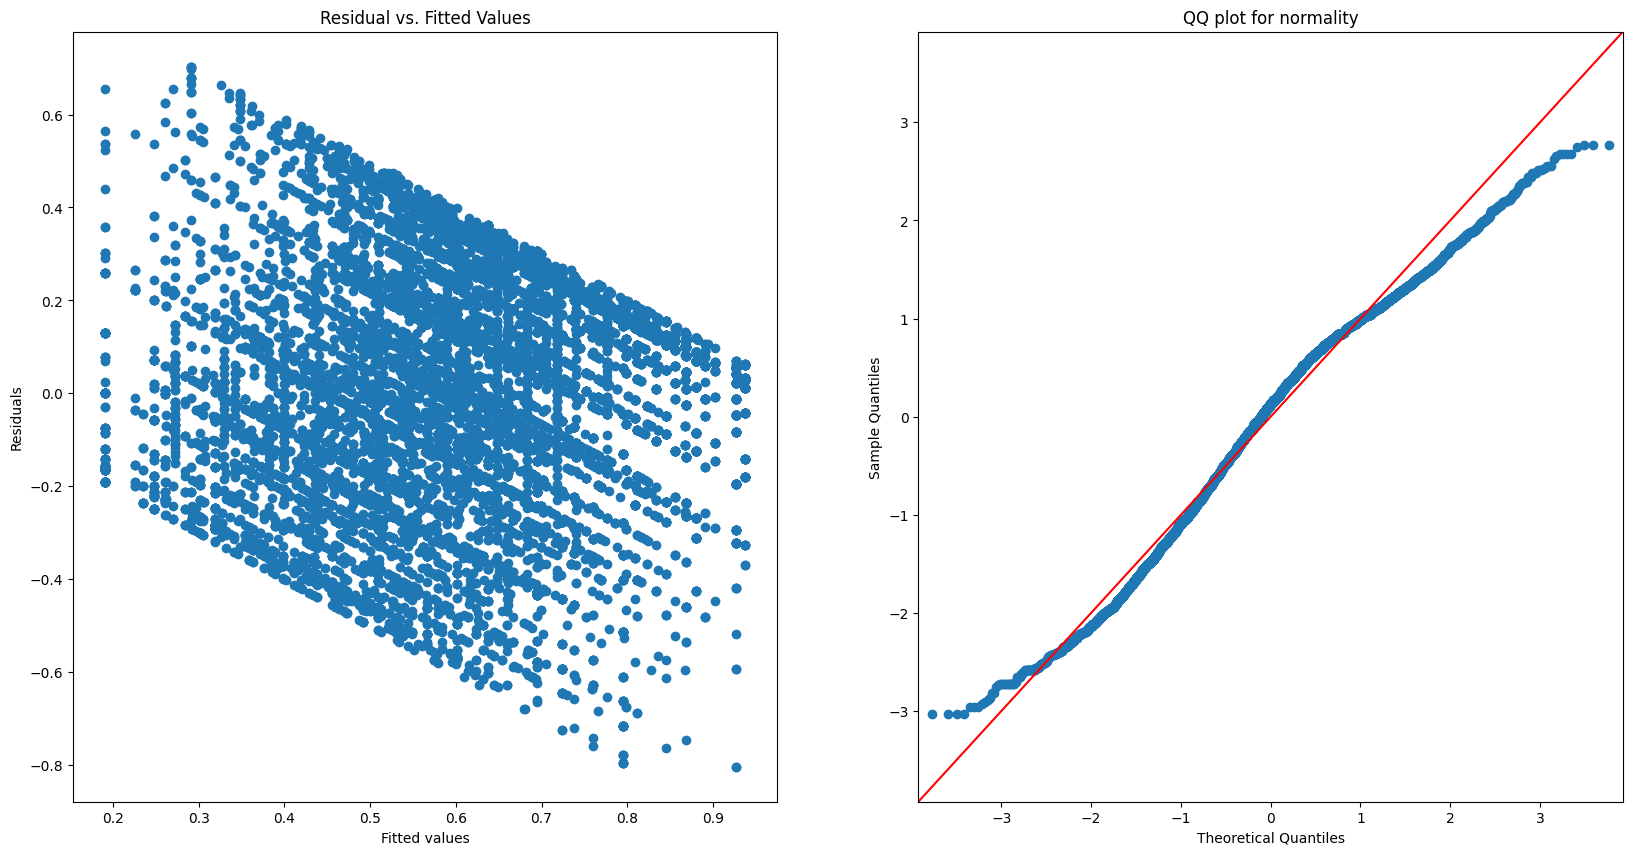

In [217]:
mod_.OLS_charts()

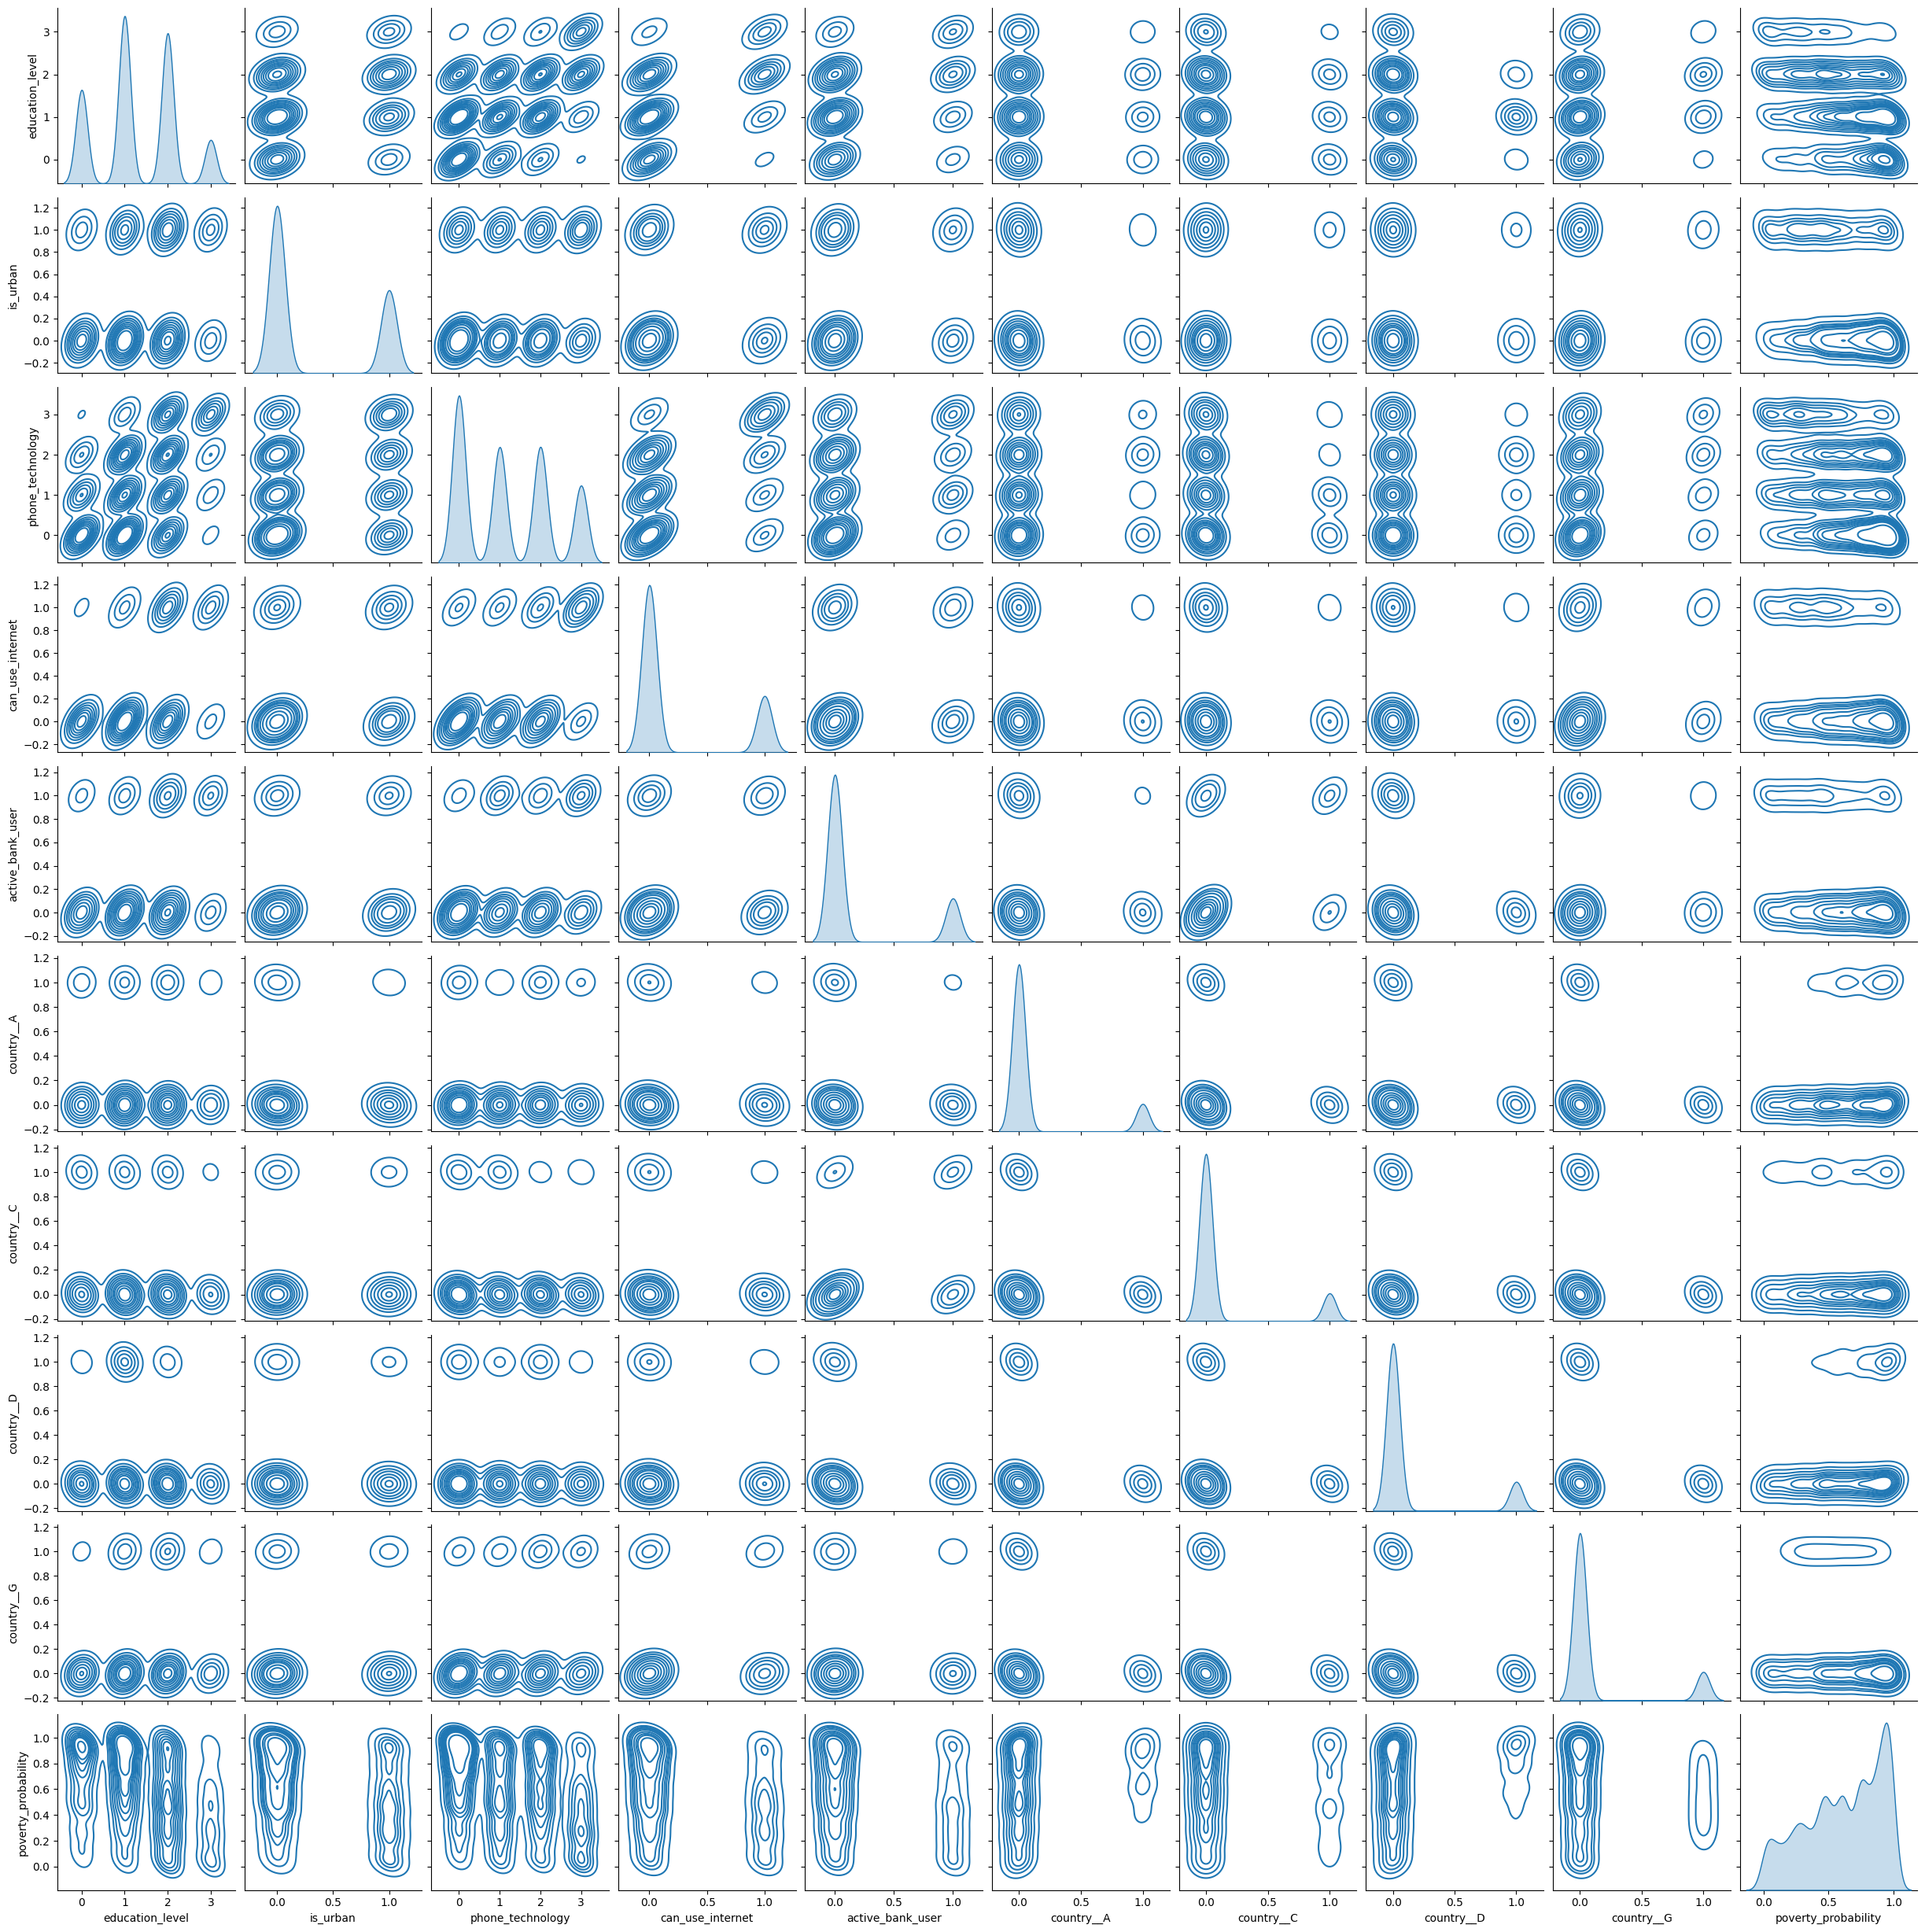

In [218]:
mod_.OLS_pairplot()